In [1]:
import pandas as pd


In [2]:
train=pd.read_csv("D:\\machine learning\\mnist\\train.csv")
test=pd.read_csv("D:\\machine learning\\mnist\\test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train=train.drop("label",axis=1)

In [5]:
Y_train=train["label"]

In [6]:
import seaborn as sns

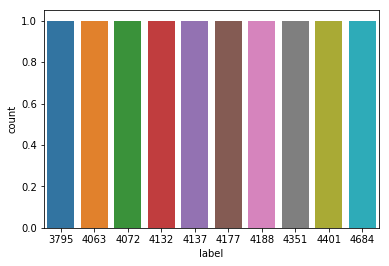

In [7]:
sns.countplot(Y_train.value_counts())

In [8]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
#normalize data
X_train=X_train/255
test=test/255

In [10]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPool2D
from keras.utils.np_utils import to_categorical 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [12]:
Y_train=to_categorical(Y_train,num_classes=10)

In [15]:
Y_train.shape

(42000, 10)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=2)

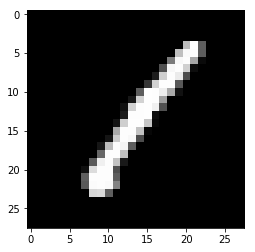

In [17]:
g = plt.imshow(X_train[0][:,:,0] ,cmap="gray")

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [19]:
model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

In [20]:
model.fit(x_train, y_train, batch_size = 32, epochs =3)


Epoch 1/3
33600/33600 [==============================] - 352s 10ms/step - loss: 0.2296 - acc: 0.9284
Epoch 2/3
33600/33600 [==============================] - 348s 10ms/step - loss: 0.0823 - acc: 0.9749
Epoch 3/3
33600/33600 [==============================] - 346s 10ms/step - loss: 0.0623 - acc: 0.9807
